In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [37]:
df = pd.read_csv(r"student-scores.csv")

df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [38]:
df.dtypes

id                             int64
first_name                    object
last_name                     object
email                         object
gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object

In [39]:
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [40]:

df= df.drop(columns=[ "first_name", "last_name", "email",'id','gender' , 'part_time_job', 'extracurricular_activities', 'absence_days'], errors='ignore')


In [42]:
df.head()

,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,27,Lawyer,73,81,93,97,63,80,87
1,47,Doctor,90,86,96,100,90,88,90
2,13,Government Officer,81,97,95,96,65,77,94
3,3,Artist,71,74,88,80,89,63,86
4,10,Unknown,84,77,65,65,80,74,76


In [43]:
df['career_aspiration'].unique()

array(['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Unknown',
       'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
       'Banker', 'Writer', 'Accountant', 'Designer',
       'Construction Engineer', 'Game Developer', 'Stock Investor',
       'Real Estate Developer'], dtype=object)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


# Cleaning 'career_aspiration'
df["career_aspiration"] = df["career_aspiration"].str.strip()

# Define mapping
career_group_mapping = {
    # Business
    "Accountant": "Business",
    "Banker": "Business",
    "Business Owner": "Business",
    "Entrepreneur": "Business",
    "Stock Investor": "Business",
    "Real Estate Developer": "Business",
    "Finance": "Business",  # Catch-all for finance roles
    "Manager": "Business",

    # Creative
    "Artist": "Creative",
    "Designer": "Creative",
    "Graphic Designer": "Creative",
    "Writer": "Creative",
    "Musician": "Creative",
    "Content Creator": "Creative",

    # Engineering
    "Construction Engineer": "Engineering",
    "Civil Engineer": "Engineering",
    "Mechanical Engineer": "Engineering",
    "Engineer": "Engineering",  # Generic fallback

    # Public Services
    "Lawyer": "Public Services",
    "Government Officer": "Public Services",
    "Teacher": "Public Services",
    "Professor": "Public Services",
    "Police Officer": "Public Services",

    # Science
    "Doctor": "Science",
    "Scientist": "Science",
    "Biologist": "Science",
    "Researcher": "Science",
    "Chemist": "Science",

    # Technology
    "Software Engineer": "Technology",
    "Software Developer": "Technology",
    "Game Developer": "Technology",
    "Data Scientist": "Technology",
    "AI Engineer": "Technology",
    "Programmer": "Technology",
    "Web Developer": "Technology",
    "IT Specialist": "Technology",

    # Other/Catch-all
    "Unknown": "Other",
    "Student": "Other",
    "Freelancer": "Other"
}

#Map career group
df["career_group"] = df["career_aspiration"].map(career_group_mapping)

# Drop rows where mapping failed
df = df.dropna(subset=["career_group"])

if df.empty:
    raise ValueError("After mapping careers, no valid samples remain. Check your mapping or dataset.")

# Define features and target
X = df.drop(columns=["career_aspiration", "career_group"])
y = df["career_group"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

#Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # MODEL TUNING WITH GRIDSEARCH
# # Parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['log2']
# }

# # Initialize and fit GridSearchCV
# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )
# grid_search.fit(X_train, y_train)

# # Get best model
# best_model = grid_search.best_estimator_
# print(f"\nBest Parameters: {grid_search.best_params_}")
# print(f"Best CV Accuracy: {grid_search.best_score_:.2f}")

# # Predictions
# y_pred = best_model.predict(X_test)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Train model
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.85

Classification Report:

                 precision    recall  f1-score   support

       Business       0.88      0.53      0.66       157
       Creative       0.85      0.94      0.89       139
    Engineering       0.84      0.98      0.90       153
          Other       0.89      0.79      0.84       156
Public Services       0.81      0.89      0.85       147
        Science       0.91      0.99      0.95       154
     Technology       0.77      0.82      0.80       158

       accuracy                           0.85      1064
      macro avg       0.85      0.85      0.84      1064
   weighted avg       0.85      0.85      0.84      1064



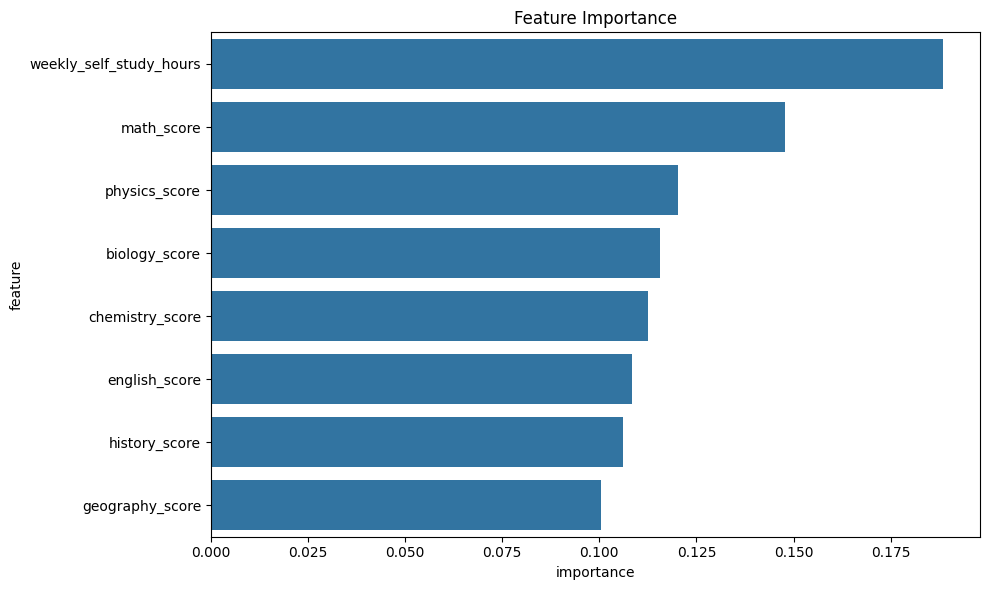

In [57]:

feat_importance = model.feature_importances_
feat_df = pd.DataFrame({'feature': X.columns, 'importance': feat_importance})
feat_df = feat_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [46]:
df['career_aspiration'].value_counts()


career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

In [82]:
career_mapping = {
    'Doctor': {'weights': {'biology_score': 0.4,
   'chemistry_score': 0.35,
   'math_score': 0.15,
   'english_score': 0.1},
  'threshold': 78,
  'description': 'Strong in life sciences, deals with human health and medicine.',
  'group': 'Science'},
    
 'Software Engineer': {'weights': {'math_score': 0.5,
   'physics_score': 0.3,
   'english_score': 0.1,
   'weekly_self_study_hours': 0.1},
  'threshold': 74,
  'description': 'Focuses on building software using logic and problem-solving.',
  'group': 'Technology'},
    
 'Data Scientist': {'weights': {'math_score': 0.5,
   'biology_score': 0.1,
   'chemistry_score': 0.1,
   'english_score': 0.1,
   'weekly_self_study_hours': 0.2},
  'threshold': 76,
  'description': 'Finds patterns in data to make decisions using math and logic.',
  'group': 'Technology'},
    
 'AI/ML Specialist': {'weights': {'math_score': 0.5,
   'physics_score': 0.2,
   'english_score': 0.1,
   'weekly_self_study_hours': 0.2},
  'threshold': 75,
  'description': 'Works with algorithms and self-learning machines.',
  'group': 'Technology'},
    
 'Electrical Engineer': {'weights': {'math_score': 0.45,
   'physics_score': 0.4,
   'english_score': 0.1,
   'weekly_self_study_hours': 0.05},
  'threshold': 70,
  'description': 'Designs and works with electrical circuits and systems.',
  'group': 'Engineering'},
    
 'Mechanical Engineer': {'weights': {'math_score': 0.45,
   'physics_score': 0.4,
   'english_score': 0.1,
   'history_score': 0.05},
  'threshold': 70,
  'description': 'Deals with mechanics, machines, and motion.',
  'group': 'Engineering'},
    
 'Civil Engineer': {'weights': {'physics_score': 0.4,
   'math_score': 0.35,
   'geography_score': 0.15,
   'english_score': 0.1},
  'threshold': 70,
  'description': 'Builds infrastructure like roads, bridges, and buildings.',
  'group': 'Engineering'},
    
 'Pharmacist': {'weights': {'biology_score': 0.45,
   'chemistry_score': 0.45,
   'english_score': 0.1},
  'threshold': 68,
  'description': 'Expert in medicines and drug interactions.',
  'group': 'Science'},
    
 'Environmental Scientist': {'weights': {'biology_score': 0.3,
   'geography_score': 0.3,
   'english_score': 0.2,
   'history_score': 0.1,
   'weekly_self_study_hours': 0.1},
  'threshold': 65,
  'description': 'Studies nature and helps solve environmental problems.',
  'group': 'Science'},
    
 'Lawyer': {'weights': {'english_score': 0.45,
   'history_score': 0.3,
   'geography_score': 0.2,
   'weekly_self_study_hours': 0.05},
  'threshold': 72,
  'description': 'Applies law, logic, and ethics in legal matters.',
  'group': 'Public Services'},
    
 'Teacher': {'weights': {'english_score': 0.3,
   'history_score': 0.25,
   'math_score': 0.25,
   'weekly_self_study_hours': 0.2},
  'threshold': 65,
  'description': 'Educates and guides students in academic subjects.',
  'group': 'Public Services'},
    
 'Psychologist': {'weights': {'biology_score': 0.3,
   'english_score': 0.3,
   'history_score': 0.2,
   'weekly_self_study_hours': 0.2},
  'threshold': 66,
  'description': 'Studies human behavior and mental processes.',
  'group': 'Humanities'},
    
 'Historian': {'weights': {'history_score': 0.5,
   'english_score': 0.3,
   'geography_score': 0.1,
   'weekly_self_study_hours': 0.1},
  'threshold': 60,
  'description': 'Explores and interprets past events and societies.',
  'group': 'Humanities'},
    
 'Geologist': {'weights': {'geography_score': 0.45,
   'physics_score': 0.25,
   'chemistry_score': 0.2,
   'english_score': 0.1},
  'threshold': 64,
  'description': 'Studies the Earth’s physical structure and history.',
  'group': 'Science'},
    
 'Biotechnologist': {'weights': {'biology_score': 0.4,
   'chemistry_score': 0.3,
   'math_score': 0.2,
   'english_score': 0.1},
  'threshold': 70,
  'description': 'Applies biology and technology for medicine and agriculture.',
  'group': 'Science'},
    
 'Political Analyst': {'weights': {'history_score': 0.3,
   'english_score': 0.3,
   'geography_score': 0.2,
   'weekly_self_study_hours': 0.2},
  'threshold': 63,
  'description': 'Analyzes political trends and public policy.',
  'group': 'Public Services'},
    
 'Business Analyst': {'weights': {'math_score': 0.4,
   'english_score': 0.25,
   'history_score': 0.2,
   'weekly_self_study_hours': 0.15},
  'threshold': 68,
  'description': 'Uses data and trends to guide business decisions.',
  'group': 'Business'},
    
 'Entrepreneur': {'weights': {'math_score': 0.3,
   'english_score': 0.25,
   'history_score': 0.2,
   'weekly_self_study_hours': 0.25},
  'threshold': 70,
  'description': 'Builds and manages business ventures creatively.',
  'group': 'Business'},
    
 'Accountant': {'weights': {'math_score': 0.5,
   'english_score': 0.2,
   'history_score': 0.2,
   'weekly_self_study_hours': 0.1},
  'threshold': 66,
  'description': 'Manages financial records, taxes, and budgets.',
  'group': 'Business'},
    
 'Financial Analyst': {'weights': {'math_score': 0.45,
   'history_score': 0.2,
   'english_score': 0.2,
   'weekly_self_study_hours': 0.15},
  'threshold': 70,
  'description': 'Analyzes market trends and company finances for investment decisions.',
  'group': 'Business'},
    
 'Human Resources Manager': {'weights': {'english_score': 0.35,
   'history_score': 0.25,
   'geography_score': 0.2,
   'weekly_self_study_hours': 0.2},
  'threshold': 64,
  'description': 'Manages people, hiring, and workplace culture.',
  'group': 'Business'},
    
 'Economist': {'weights': {'math_score': 0.4,
   'english_score': 0.2,
   'history_score': 0.25,
   'weekly_self_study_hours': 0.15},
  'threshold': 72,
  'description': 'Studies how resources are produced and consumed.',
  'group': 'Business'}
}


In [75]:
def recommend_careers_from_scores(student_scores, career_mapping, top_k=3):
    recommendations = []

    for career, details in career_mapping.items():
        weights = details['weights']
        threshold = details.get('threshold', 0)
        
        # Weighted score calculation
        weighted_score = sum(
            student_scores.get(subject, 0) * weight 
            for subject, weight in weights.items()
        )
        normalized_score = weighted_score / sum(weights.values())

        # Append all (even below threshold), then sort and filter
        recommendations.append((career, normalized_score, details['description']))

    # Sort by score descending
    recommendations.sort(key=lambda x: x[1], reverse=True)

    top_recommendations = recommendations[:top_k]
    
    return {
        "recommended_careers": [c[0] for c in top_recommendations],
        "career_scores": [round(c[1], 2) for c in top_recommendations],
        "descriptions": [c[2] for c in top_recommendations],
    }


In [76]:

student_scores = {
    "biology_score": 95,
    "chemistry_score": 80,
    "math_score": 95,
    "english_score": 88,
    "physics_score": 90,
    "computer_score": 92,
    "statistics_score": 84,
    "economics_score": 56,
    "history_score": 60,
    "geography_score": 65
}

# Run the recommendation
# result = full_recommender(student_scores, model, features, career_mapping)
result = recommend_careers_from_scores(student_scores, career_mapping)
print(result)


{'recommended_careers': ['Mechanical Engineer', 'Biotechnologist', 'Doctor'], 'career_scores': [90.55, 89.8, 89.05], 'descriptions': ['Deals with mechanics, machines, and motion.', 'Applies biology and technology for medicine and agriculture.', 'Strong in life sciences, deals with human health and medicine.']}


In [77]:
def recommend_top_careers(model, input_scores, feature_columns, imputer, top_n=3):
    import pandas as pd
    import numpy as np

    # Ensure all required features are in the input
    input_dict = {col: input_scores.get(col, np.nan) for col in feature_columns}
    
    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Impute missing values using the training imputer
    input_df_imputed = pd.DataFrame(imputer.transform(input_df), columns=feature_columns)

    # Predict probabilities
    probs = model.predict_proba(input_df_imputed)[0]
    classes = model.classes_
    top_indices = np.argsort(probs)[::-1][:top_n]
    top_careers = [(classes[i], round(probs[i], 3)) for i in top_indices]

    return top_careers


In [83]:
# Input example
student_scores = {
    'math_score': 95,
    'physics_score': 98,
    'chemistry_score': 92,
    'biology_score': 95,
    'english_score': 90,
    'history_score': 90,
    'geography_score': 98,
    'weekly_self_study_hours': 22
}

# Use same column order as during training
feature_columns = X.columns.tolist()

# Get top 3 recommended careers
recommendations = recommend_top_careers(model, student_scores, feature_columns,imputer)

print("Top 3 Career Recommendations:")
for i, (career, prob) in enumerate(recommendations, 1):
    print(f"{i}. {career} ({prob*100:.1f}%)")


Top 3 Career Recommendations:
1. Engineering (29.5%)
2. Creative (19.5%)
3. Science (16.5%)


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [72]:
import pickle
pickle.dump(model, open("career_model.pkl", "wb"))
pickle.dump(imputer, open("imputer.pkl", "wb"))

In [85]:
pickle.dump(career_mapping, open("career_mapping.pkl", "wb"))